In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
import csv

'c:\\Users\\riyap\\OneDrive\\Desktop\\Movie data analyst'

In [ ]:
file_path = r"C:\Users\riyap\Downloads\mymoviedb.csv"


df = pd.read_csv(file_path,engine='python',encoding='latin1',on_bad_lines='skip')   

In [13]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [15]:
df['Genre'].head

<bound method NDFrame.head of 0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9832                          Drama, Crime
9833                                Horror
9834             Mystery, Thriller, Horror
9835                 Music, Drama, History
9836           War, Drama, Science Fiction
Name: Genre, Length: 9837, dtype: object>

In [16]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9837, dtype: bool>

In [17]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [30]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

print(df['Release_Date'].dtype)



datetime64[ns]


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Release_Year'] = df['Release_Date'].dt.year

print(df[['Release_Date', 'Release_Year']].dtypes)


Release_Date    datetime64[ns]
Release_Year             int32
dtype: object


In [38]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,1970.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,1970.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,1970.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,1970.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,1970.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [43]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [44]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [45]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,1970.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,1970.0,No Exit,2618.087,122,6.3,Thriller
3,1970.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,1970.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorizing Vote_Average column:

We would cut the Vote_Average values and make 4 categories: popular, avg, below_avg, not_popular to describe it more using catigorize_col() function provided above.**

In [46]:
def catigorize_col(df, col, labels):
    edge = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    df[col] = pd.cut(df[col], edge, labels=labels, duplicates='drop')
    return df

In [ ]:

df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

bins = [0, 2.5, 5, 7.5, 10]
labels = ['not_popular', 'below_avg', 'average', 'popular']

df['Vote_Average_Category'] = pd.cut(df['Vote_Average'], bins=bins, labels=labels, include_lowest=True)

print(df['Vote_Average_Category'].unique())


['popular', 'average', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [50]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,1970.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,1970.0,No Exit,2618.087,122,6.3,Thriller,average
3,1970.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,1970.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [51]:
df['Vote_Average'].value_counts()

Vote_Average
6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
9.2       1
1.8       1
2.4       1
2.6       1
10.0      1
Name: count, Length: 74, dtype: int64

In [52]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_Category    0
dtype: int64

In [53]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,1970.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,1970.0,No Exit,2618.087,122,6.3,Thriller,average
3,1970.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,1970.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [54]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head

<bound method NDFrame.head of        Release_Date                                 Title  Popularity  \
0            1970.0               Spider-Man: No Way Home    5083.954   
1            1970.0               Spider-Man: No Way Home    5083.954   
2            1970.0               Spider-Man: No Way Home    5083.954   
3            1970.0                            The Batman    3827.658   
4            1970.0                            The Batman    3827.658   
...             ...                                   ...         ...   
25787        1970.0  The United States vs. Billie Holiday      13.354   
25788        1970.0  The United States vs. Billie Holiday      13.354   
25789        1970.0                               Threads      13.354   
25790        1970.0                               Threads      13.354   
25791        1970.0                               Threads      13.354   

      Vote_Count  Vote_Average            Genre Vote_Average_Category  
0           8940     

In [55]:
#casting column into category

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25792 non-null  float64 
 1   Title                  25792 non-null  object  
 2   Popularity             25792 non-null  float64 
 3   Vote_Count             25792 non-null  object  
 4   Vote_Average           25792 non-null  float64 
 5   Genre                  25792 non-null  category
 6   Vote_Average_Category  25792 non-null  category
dtypes: category(2), float64(3), object(2)
memory usage: 1.0+ MB


In [57]:
df.nunique()

Release_Date                1
Title                    9512
Popularity               8159
Vote_Count               3266
Vote_Average               74
Genre                      19
Vote_Average_Category       4
dtype: int64

In [58]:
df.head

<bound method NDFrame.head of        Release_Date                                 Title  Popularity  \
0            1970.0               Spider-Man: No Way Home    5083.954   
1            1970.0               Spider-Man: No Way Home    5083.954   
2            1970.0               Spider-Man: No Way Home    5083.954   
3            1970.0                            The Batman    3827.658   
4            1970.0                            The Batman    3827.658   
...             ...                                   ...         ...   
25787        1970.0  The United States vs. Billie Holiday      13.354   
25788        1970.0  The United States vs. Billie Holiday      13.354   
25789        1970.0                               Threads      13.354   
25790        1970.0                               Threads      13.354   
25791        1970.0                               Threads      13.354   

      Vote_Count  Vote_Average            Genre Vote_Average_Category  
0           8940     

# Data Visulation

In [59]:
sns.set_style('whitegrid')

# What is the most frequent genre of the movies released on netflix ?

In [60]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

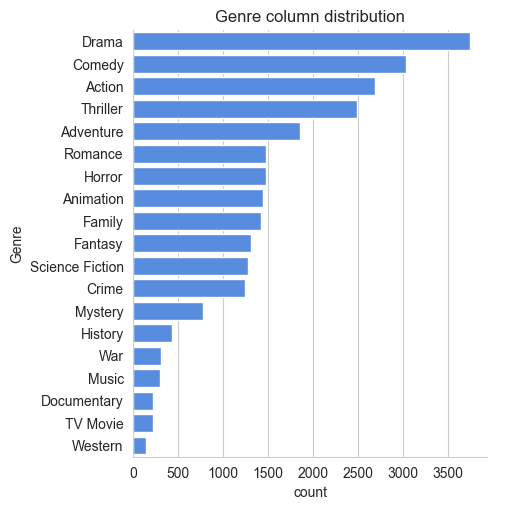

In [61]:
sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,
    color='#4287f5'   
)
plt.title('Genre column distribution')
plt.show()


# Which has highest votes in vote avg column ?

In [62]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,1970.0,The Batman,3827.658,1151,8.1,Crime,popular
4,1970.0,The Batman,3827.658,1151,8.1,Mystery,popular


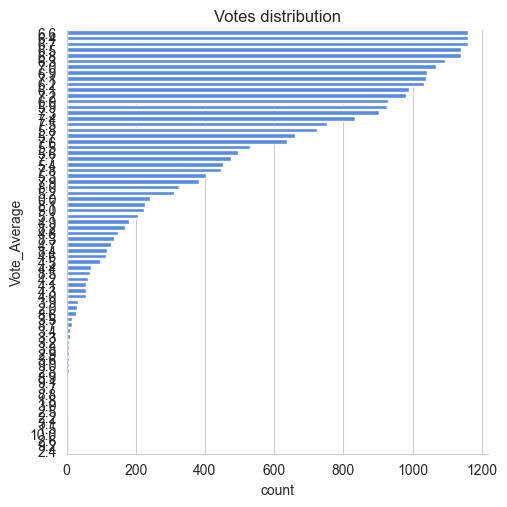

In [63]:
sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    color='#4287f5'
)
plt.title('Votes distribution')
plt.show()

# What movies got the highest popularity? what's its genre?¶

In [64]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular


In [65]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,1970.0,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


# What movie got the lowest popularity? what's it's genre?

In [66]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
25786,1970.0,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25787,1970.0,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25788,1970.0,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25789,1970.0,Threads,13.354,186,7.8,War,popular
25790,1970.0,Threads,13.354,186,7.8,Drama,popular
25791,1970.0,Threads,13.354,186,7.8,Science Fiction,popular


# Which year has the most filmmed movies ?¶

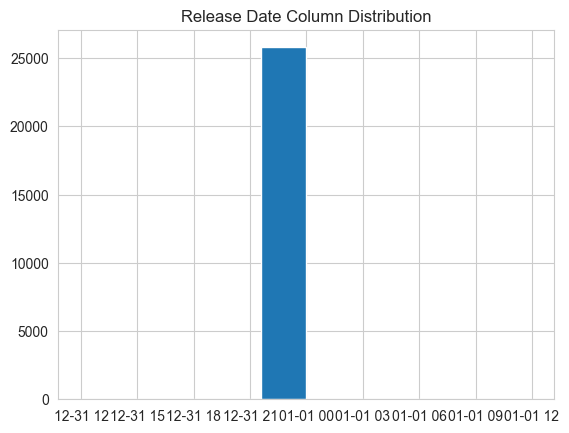

In [80]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()